<a href="https://colab.research.google.com/github/anarghya-04/ICSSL/blob/main/ICSSL6_polynomial_regression_bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anarghyachethan","key":"0263e5fa9113c86f7c345513c41c571b"}'}

In [2]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [4]:
!kaggle datasets download -d mirajdeepbhandari/polynomial-regression

Dataset URL: https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression
License(s): CC0-1.0
  0% 0.00/1.18k [00:00<?, ?B/s]
100% 1.18k/1.18k [00:00<00:00, 4.78MB/s]


In [5]:
!unzip polynomial-regression.zip

Archive:  polynomial-regression.zip
  inflating: Ice_cream selling data.csv  


In [6]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

In [7]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Ice_cream selling data.csv',
 'kaggle.json',
 'polynomial-regression.zip',
 'sample_data']

The Ice_cream selling data.csv is available!

In [8]:
data = pd.read_csv("Ice_cream selling data.csv") # Read the csv file into a pandas dataframe
type(data)

pandas.core.frame.DataFrame

In [9]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [10]:
data.shape

(49, 2)

In [11]:
data.info() # Gives basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [12]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [24]:
X = data.iloc[:, :-1] # : is take all rows, :-1 all columns except the last column
Y = data.iloc[:, -1] # The last column is the y value

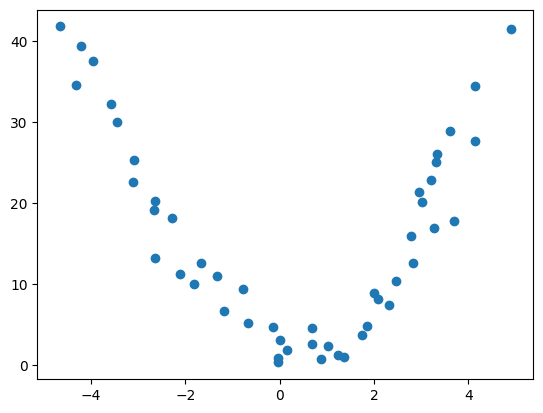

In [25]:
plt.figure()
plt.scatter(X,Y) #Looks like a parabola

Linearizing

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) #0.3 means 20% of dataset goes into test dataset.
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(34, 1) (34,) (15, 1) (15,)


In [29]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
r2_train = model.score(X_train, Y_train) #Returns the coefficient of determination or R^2 of train dataset.
r2_test = model.score(X_test, Y_test)
print(r2_train, r2_test)
print(model.coef_, model.intercept_)

0.02937510720510217 -0.03912798782600069
[-0.76405794] 16.962431949649158


R2 for tes dataset is negative as the mean is calculated using train data and the prediction of test data is worse than the mean. There are differences between the train and test dataset. Overall the model is week due to low R2.

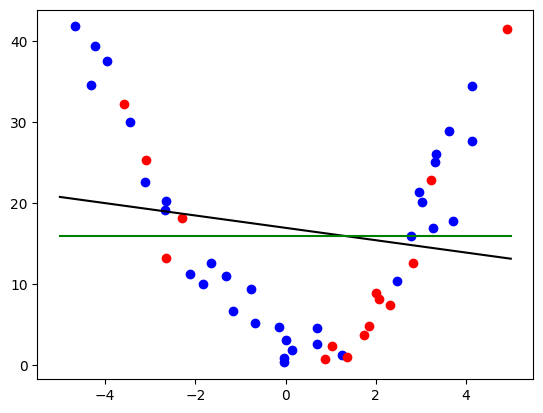

In [33]:
plt.figure()
plt.scatter(X_train, Y_train, c ="b")
plt.scatter(X_test, Y_test, c= "r")
X_values = np.arange(-5,5,0.01)
Y_values = model.coef_[0]*X_values + model.intercept_
plt.plot(X_values, Y_values, "k")
plt.plot(X_values, [np.mean(Y)]*len(X_values), c="g")

Polinomial Regression

In [47]:
poly_features = PolynomialFeatures(degree = 2)
X_transform = poly_features.fit_transform(X) #[B0, B1, B2] matrix

X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, test_size = 0.3, random_state = 0)

#Fit using linear regression
model = LinearRegression()
model.fit(X_train,Y_train)

r2_train = model.score(X_train, Y_train)
r2_test = model.score(X_test, Y_test)

Y_train_predict = model.predict(X_train)
Y_test_predict = model.predict(X_test)

train_error = mean_squared_error(Y_train, Y_train_predict)
test_error = mean_squared_error(Y_test, Y_test_predict)

print(r2_train, r2_test)
print(train_error, test_error)

0.933109383805153 0.9112396415848207
9.861627186505526 12.351860655176438


In [36]:
print(X_transform[0], X_transform[0,1]**2)

[ 1.         -4.66226268 21.73669327] 21.73669327140054


Plot x axis degrees and y axis train error and test error.

In [50]:
degrees = range(1, 10) #Check her github for complete answers
train_error = []
test_error = []

for degree in degrees:
  if degrees>:
    poly_features = PolynomialFeatures(degree = degrees)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>